In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
    compress_repeated_epochs,
    batch_analysis,
    add_new_deep_sup,
    custom_plots
)
from ripple_heterogeneity.replay import replay_run, replay_fig, replay_participation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random
from matplotlib.ticker import AutoMinorLocator

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [4]:
df = pd.DataFrame()
df["basepath"] = ["Z:\Data\Can\OML22\day7",
                "Z:\Data\Can\OML22\day8",
                "Z:\Data\Can\OML22\day19",
                "Z:\Data\Can\OML22\day20"]
df

,basepath
0,Z:\Data\Can\OML22\day7
1,Z:\Data\Can\OML22\day8
2,Z:\Data\Can\OML22\day19
3,Z:\Data\Can\OML22\day20


In [ ]:
basepath = r"Z:\Data\Can\OML22\day7"
    
cell_metrics, data, ripples, fs_dat = loading.load_basic_data(basepath)

# load session epoch data
epoch_df = loading.load_epoch(basepath)
# get session bounds to provide support
session_bounds = nel.EpochArray(
    [epoch_df.startTime.iloc[0], epoch_df.stopTime.iloc[-1]]
)



In [14]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_cans_rats"

batch_analysis.run(
    df,
    save_path,
    replay_run.run_all,
    parallel=True,
    traj_shuff=1000,
    verbose=True,
    place_cell_peak_mean_ratio=1,
    expand_canidate_by_mua=False,
)

100%|██████████| 4/4 [00:00<00:00, 332.49it/s]


In [4]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_cans_rats"

df = replay_run.load_results(save_path,pre_task_post=False)


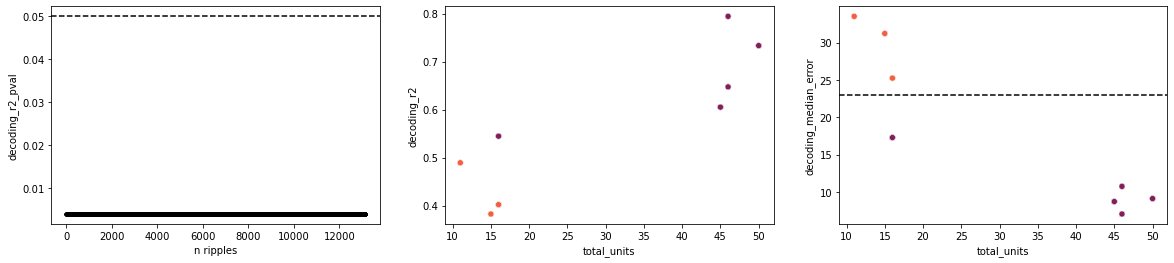

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
axs[0].plot(df.decoding_r2_pval, '.k')
axs[0].set_ylabel('decoding_r2_pval')
axs[0].set_xlabel('n ripples')
axs[0].axhline(0.05, color='k', linestyle='--')

sns.scatterplot(x="total_units", y="decoding_r2",
                hue=df.decoding_median_error<23,
                data=df, ax=axs[1], legend=False, palette="rocket_r")

sns.scatterplot(x="total_units", y="decoding_median_error",
                hue=df.decoding_median_error<23,palette="rocket_r",
                data=df, ax=axs[2], legend=False)
# axs[2].legend(bbox_to_anchor=(1.1, 1.05))
axs[2].axhline(23, color='k', linestyle='--')

In [5]:
print(df[df.decoding_r2_pval > 0.05].basepath.unique())
print(df[df.decoding_median_error > 23].basepath.unique())

[]
['Z:\\Data\\Can\\OML22\\day19' 'Z:\\Data\\Can\\OML22\\day20']


In [6]:
df = df[(df.decoding_r2_pval < 0.05) & (df.decoding_median_error < 23)]


In [7]:
df[df.score_pval_time_swap < 0.05].basepath.value_counts()

Z:\Data\Can\OML22\day7     218
Z:\Data\Can\OML22\day8     167
Z:\Data\Can\OML22\day20     50
Name: basepath, dtype: int64

In [21]:
df.head()

,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,traj_dist,traj_speed,traj_step,replay_type,pop_partic,decoding_r2,decoding_r2_pval,decoding_median_error,total_units,direction
3063,127.1392,127.2360,127.1864,242.262210,0.0968,134.044654,bz_DetectSWR,47,1,Z:\Data\Can\OML22\day20,...,222.3,3705.0,74.1,forward,0.5000,0.544907,0.003984,17.284601,16.0,outbound_epochs
3064,241.6160,241.7032,241.6936,614.043851,0.0872,134.330496,bz_DetectSWR,47,1,Z:\Data\Can\OML22\day20,...,83.7,1395.0,27.9,reverse,0.3125,0.544907,0.003984,17.284601,16.0,outbound_epochs
3065,273.9592,274.0488,273.9808,518.925832,0.0896,166.595349,bz_DetectSWR,47,1,Z:\Data\Can\OML22\day20,...,10.8,180.0,3.6,reverse,0.4375,0.544907,0.003984,17.284601,16.0,outbound_epochs
3066,319.9072,320.0136,319.9592,196.754254,0.1064,93.675777,bz_DetectSWR,47,1,Z:\Data\Can\OML22\day20,...,263.7,4395.0,87.9,forward,0.3750,0.544907,0.003984,17.284601,16.0,outbound_epochs
3067,439.0944,439.1856,439.1592,1016.846624,0.0912,178.082696,bz_DetectSWR,47,1,Z:\Data\Can\OML22\day20,...,18.0,300.0,9.0,forward,0.3125,0.544907,0.003984,17.284601,16.0,outbound_epochs


In [26]:
df.keys()

Index(['start', 'stop', 'peaks', 'amplitude', 'duration', 'frequency',
       'detectorName', 'ripple_channel', 'event_spk_thres', 'basepath',
       'basename', 'animal', 'n_active', 'inactive_bin_prop',
       'trajectory_score', 'r_squared', 'slope', 'intercept',
       'score_pval_time_swap', 'score_pval_col_cycle', 'traj_dist',
       'traj_speed', 'traj_step', 'replay_type', 'pop_partic', 'decoding_r2',
       'decoding_r2_pval', 'decoding_median_error', 'total_units',
       'direction'],
      dtype='object')

In [38]:
pd.crosstab(df.replay_type, df.direction).apply(lambda r: r/r.sum(), axis=1)

direction,inbound_epochs,outbound_epochs
replay_type,,
forward,0.449654,0.550346
reverse,0.448148,0.551852
unknown,0.393939,0.606061


In [35]:
# get proportion of canidates that are replay events
df.replay_type.value_counts() / df.replay_type.value_counts().sum()


forward    0.500270
reverse    0.496163
unknown    0.003567
Name: replay_type, dtype: float64

In [43]:
print(((df.score_pval_time_swap < 0.05) & (df.direction == "inbound_epochs")).sum() /  (df.direction == "inbound_epochs").sum())
print(((df.score_pval_time_swap < 0.05) & (df.direction == "outbound_epochs")).sum() /  (df.direction == "outbound_epochs").sum())


0.053240183088412434
0.04196078431372549


In [31]:
res = (pd.crosstab(df.replay_type, df.direction, margins=True, margins_name='Total')
      .iloc[:,:-1]
      .rename_axis(None)
)
display(res)
res = (pd.crosstab(df[df.score_pval_time_swap < 0.05].replay_type, df[df.score_pval_time_swap < 0.05].direction, margins=True, margins_name='Total')
      .iloc[:,:-1]
      .rename_axis(None)
)
res

direction,inbound_epochs,outbound_epochs
forward,2081,2547
reverse,2057,2533
unknown,13,20
Total,4151,5100


direction,inbound_epochs,outbound_epochs
forward,120,100
reverse,101,114
Total,221,214


In [22]:
df[df.score_pval_time_swap < 0.05].replay_type.value_counts()

forward    220
reverse    215
Name: replay_type, dtype: int64

<AxesSubplot:xlabel='direction', ylabel='pop_partic'>

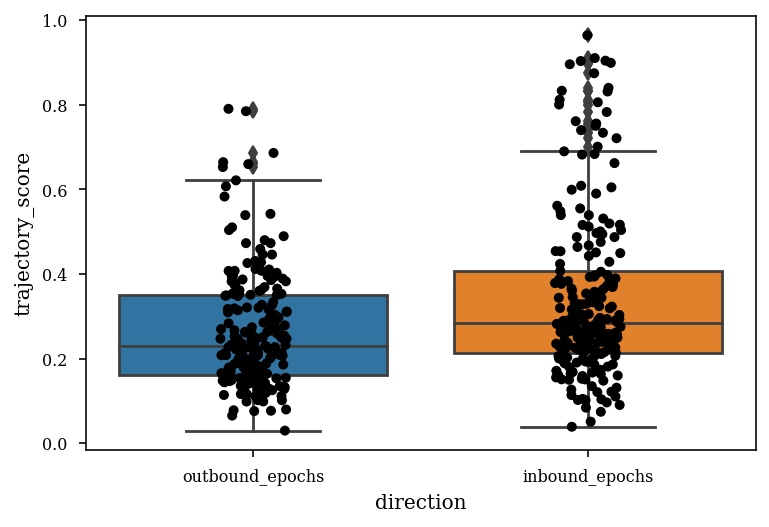

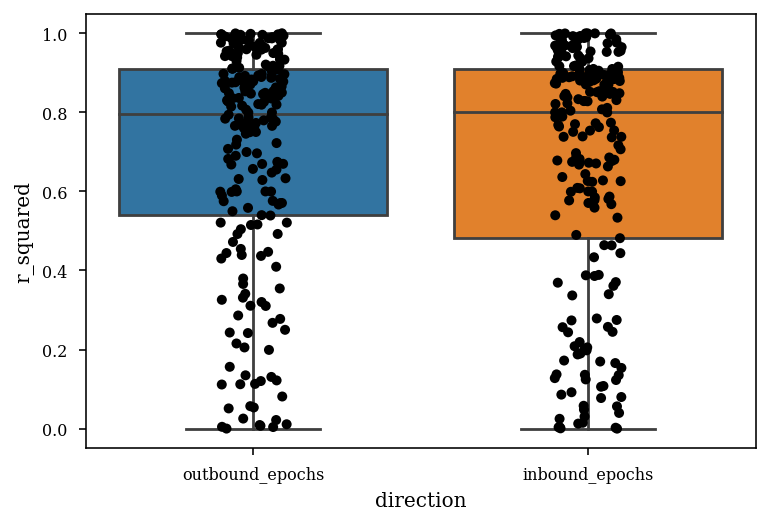

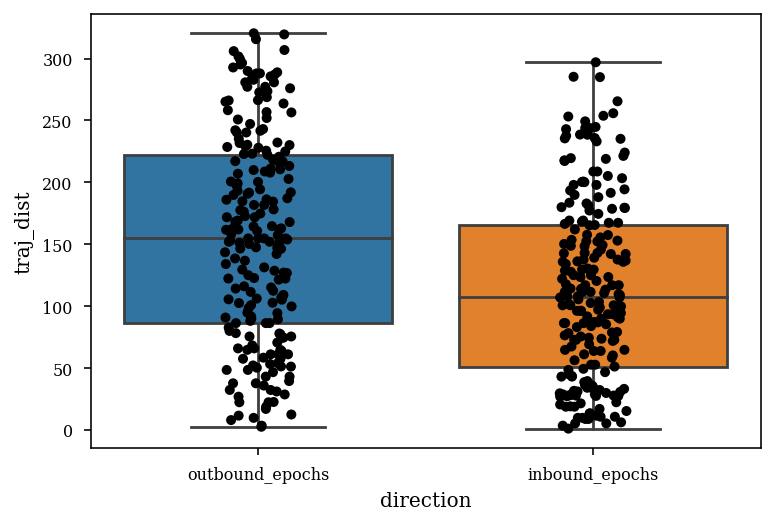

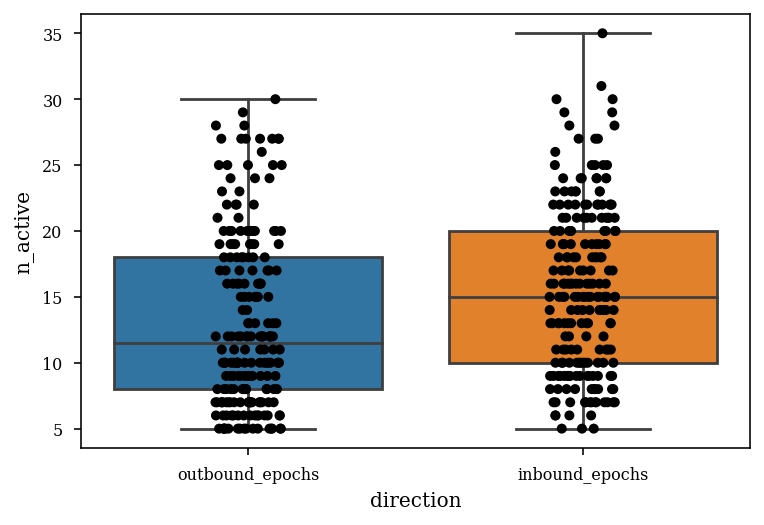

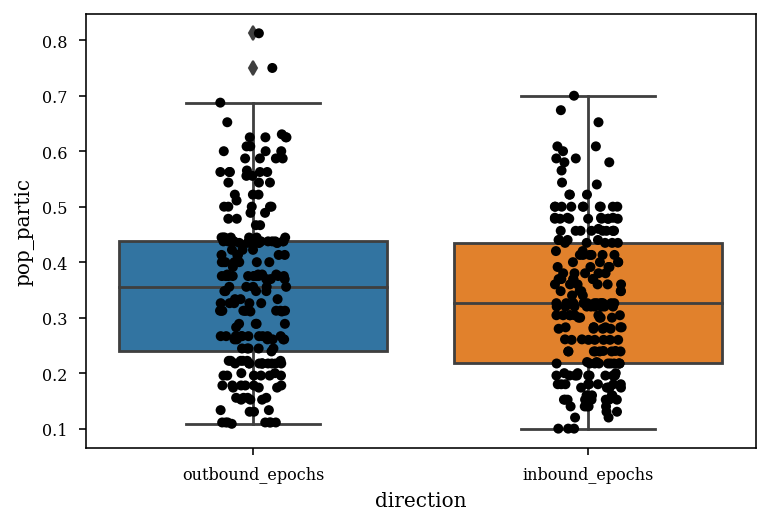

In [20]:
sns.boxplot(x="direction", y="trajectory_score", data=df[df.score_pval_time_swap < 0.05])
sns.stripplot(x="direction", y="trajectory_score", data=df[df.score_pval_time_swap < 0.05],color='k')

plt.figure()
sns.boxplot(x="direction", y="r_squared", data=df[df.score_pval_time_swap < 0.05])
sns.stripplot(x="direction", y="r_squared", data=df[df.score_pval_time_swap < 0.05],color='k')

plt.figure()
sns.boxplot(x="direction", y="traj_dist", data=df[df.score_pval_time_swap < 0.05])
sns.stripplot(x="direction", y="traj_dist", data=df[df.score_pval_time_swap < 0.05],color='k')


plt.figure()
sns.boxplot(x="direction", y="n_active", data=df[df.score_pval_time_swap < 0.05])
sns.stripplot(x="direction", y="n_active", data=df[df.score_pval_time_swap < 0.05],color='k')

plt.figure()
sns.boxplot(x="direction", y="pop_partic", data=df[df.score_pval_time_swap < 0.05])
sns.stripplot(x="direction", y="pop_partic", data=df[df.score_pval_time_swap < 0.05],color='k')

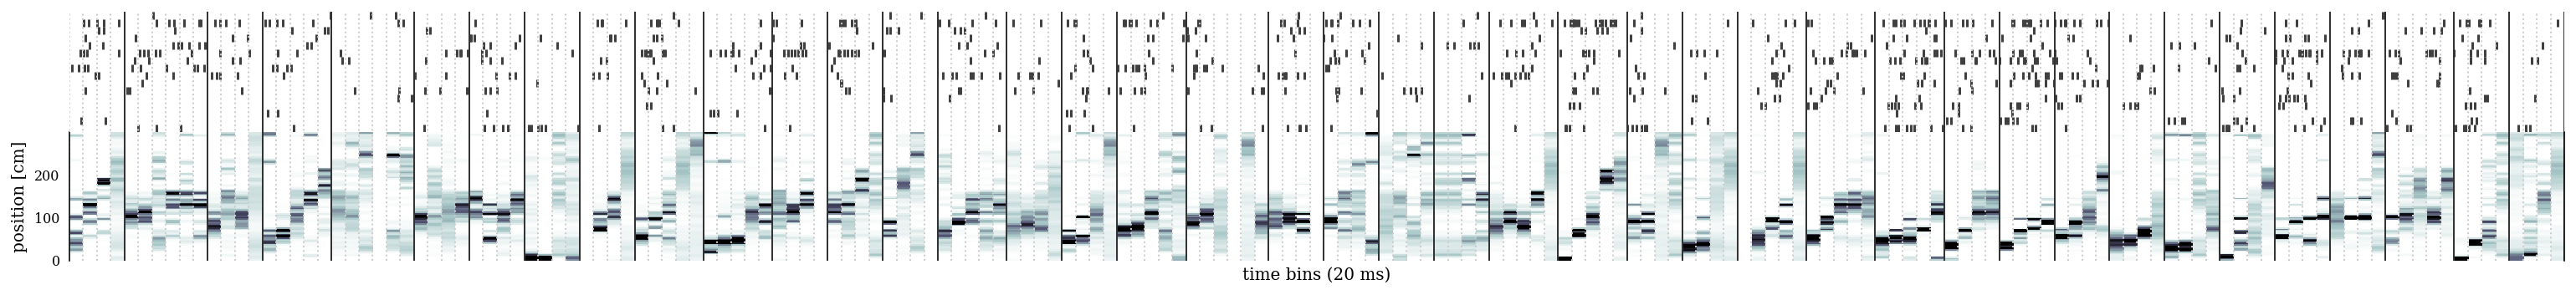

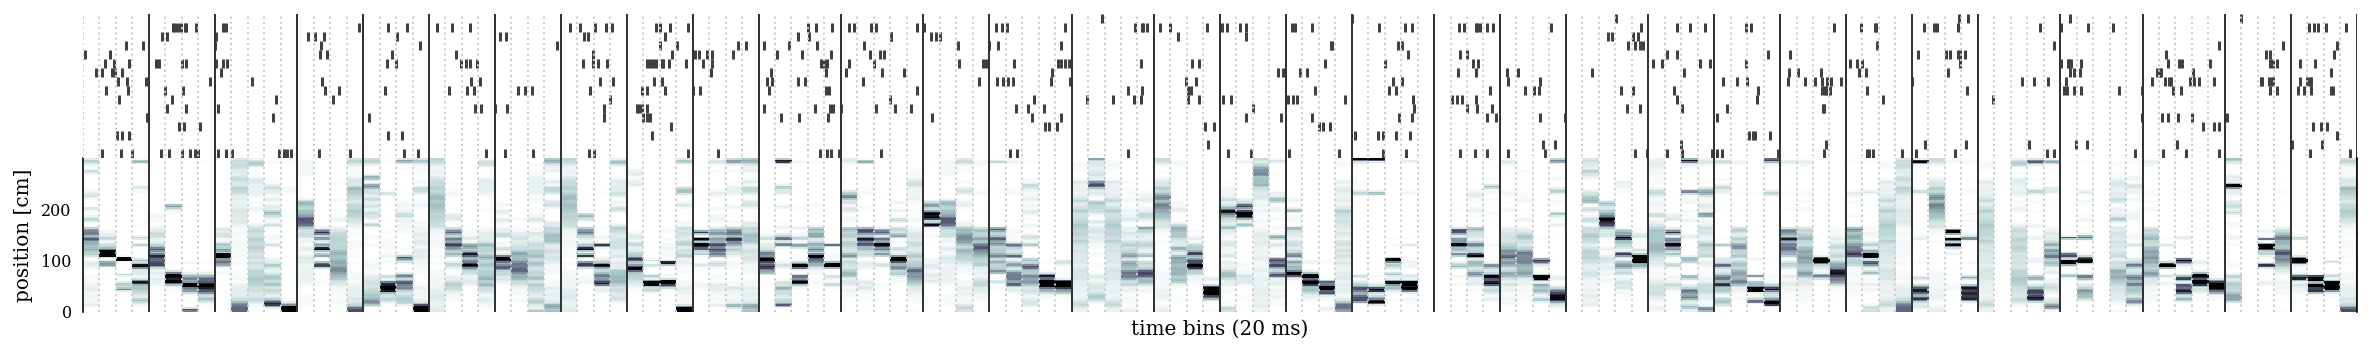

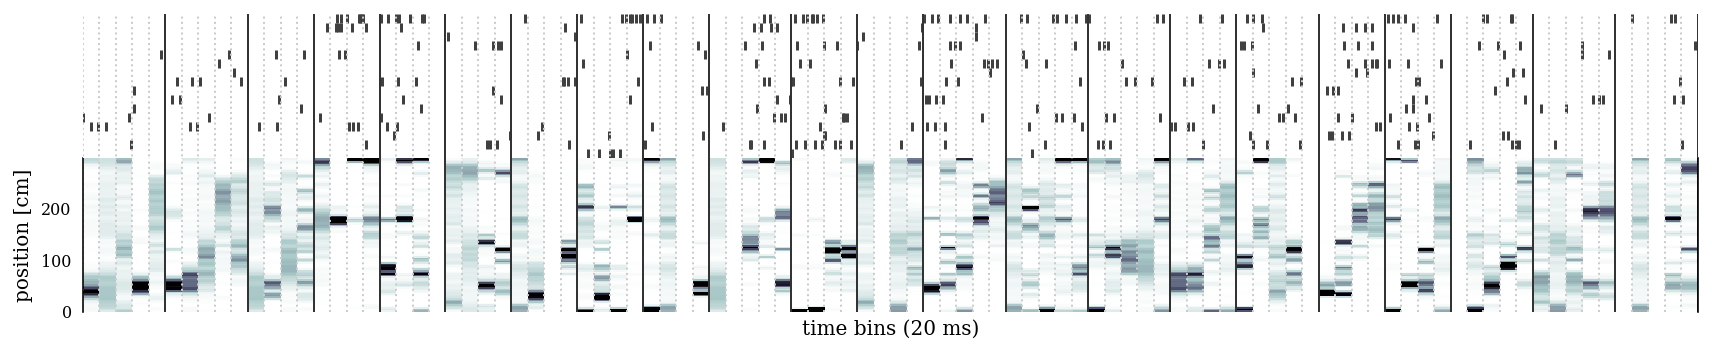

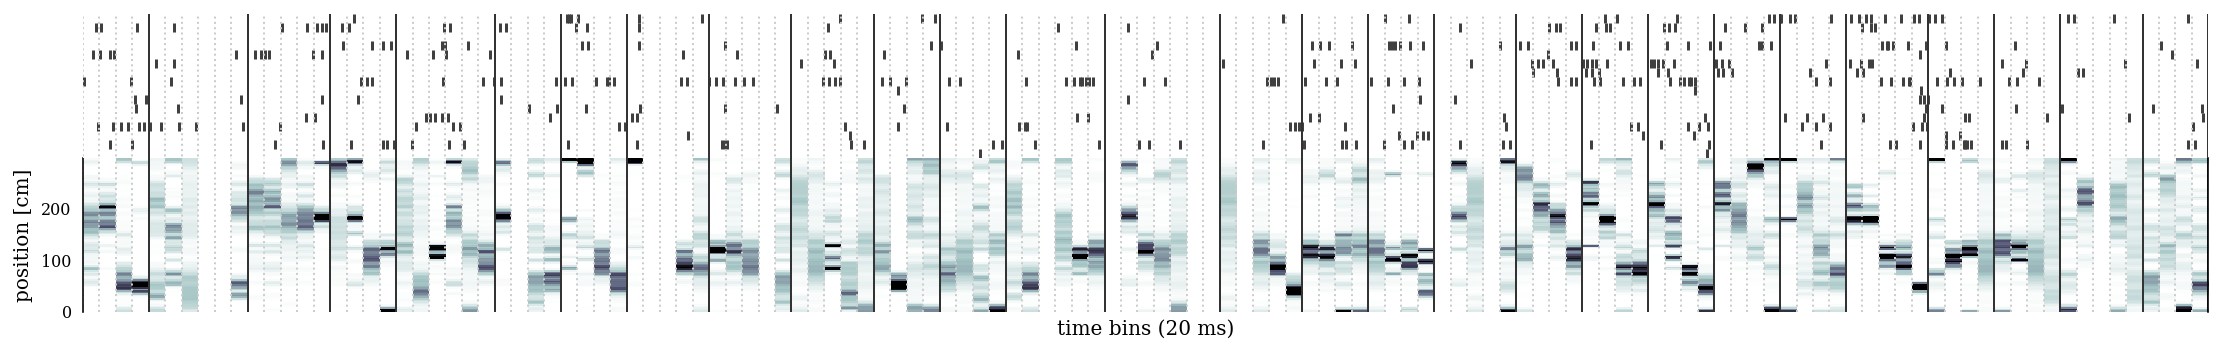

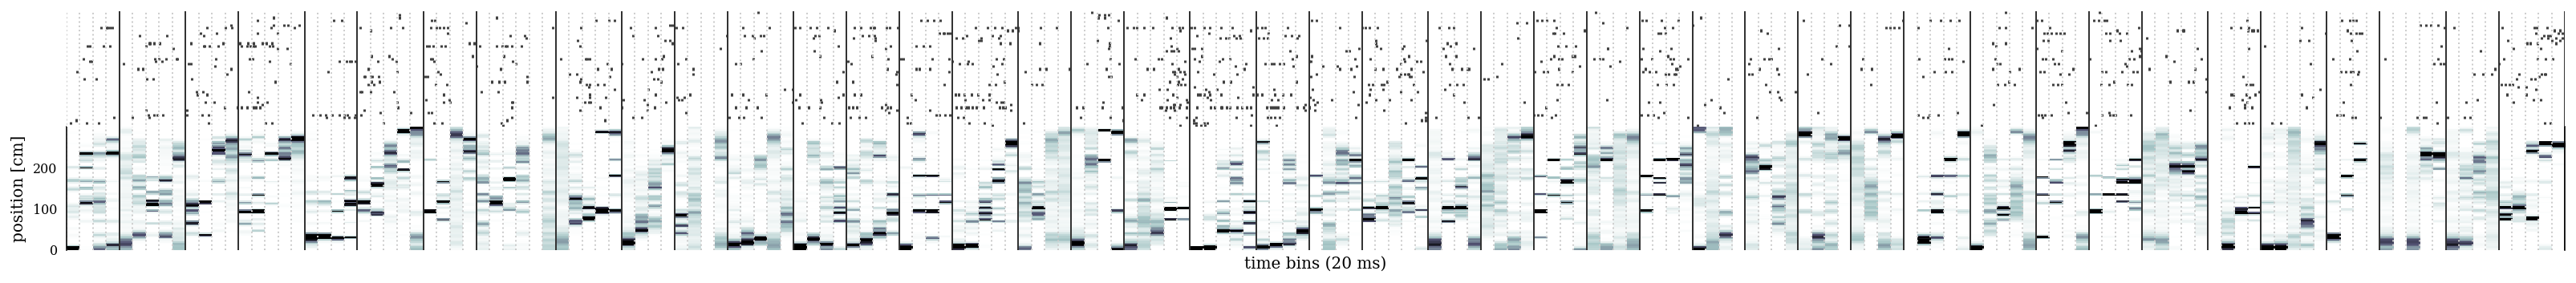

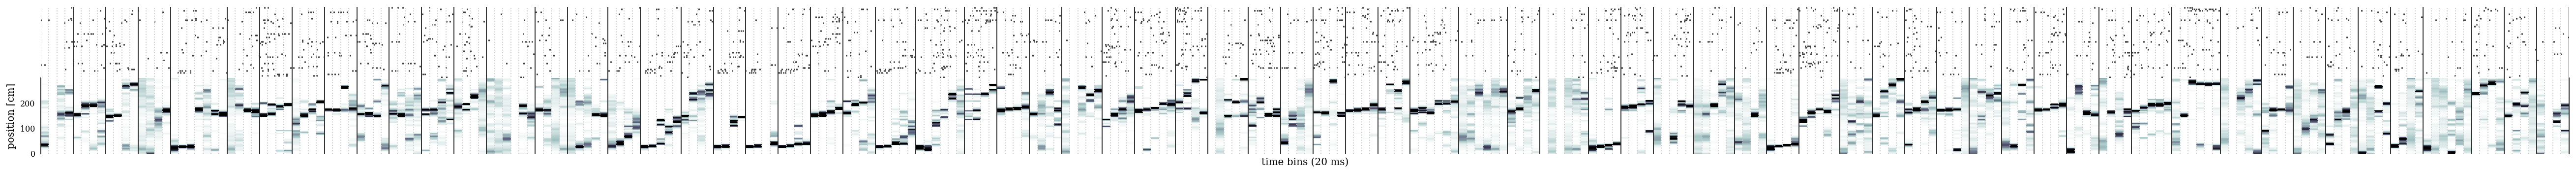

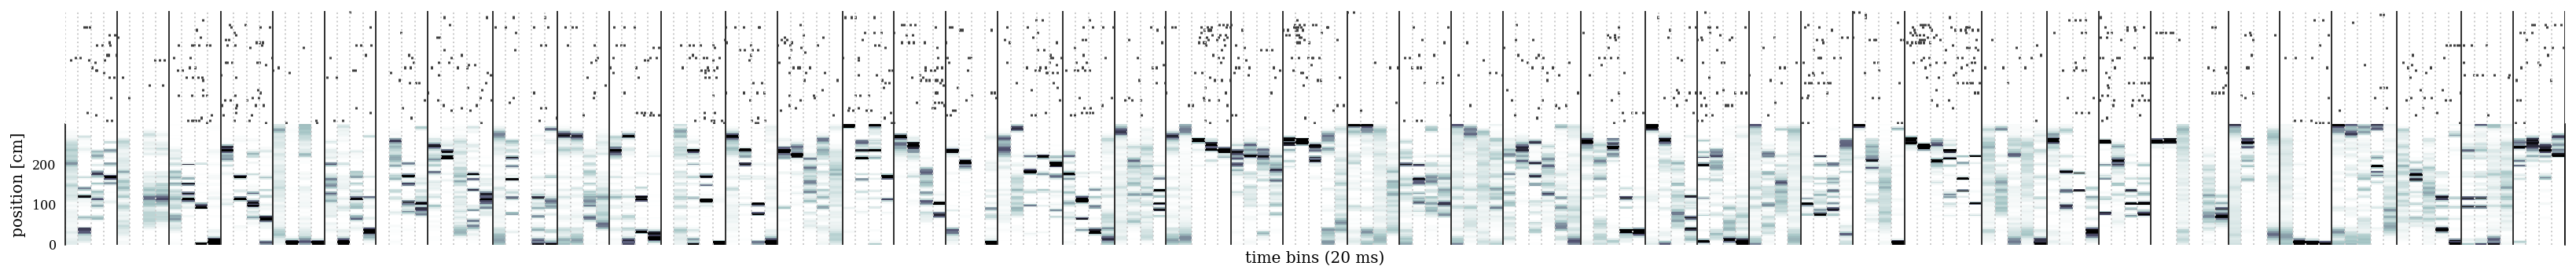

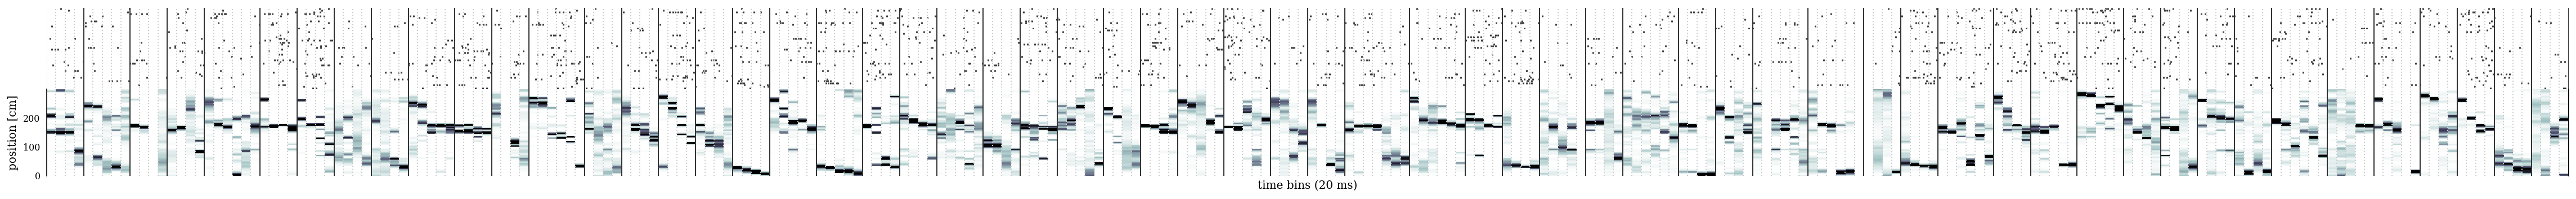

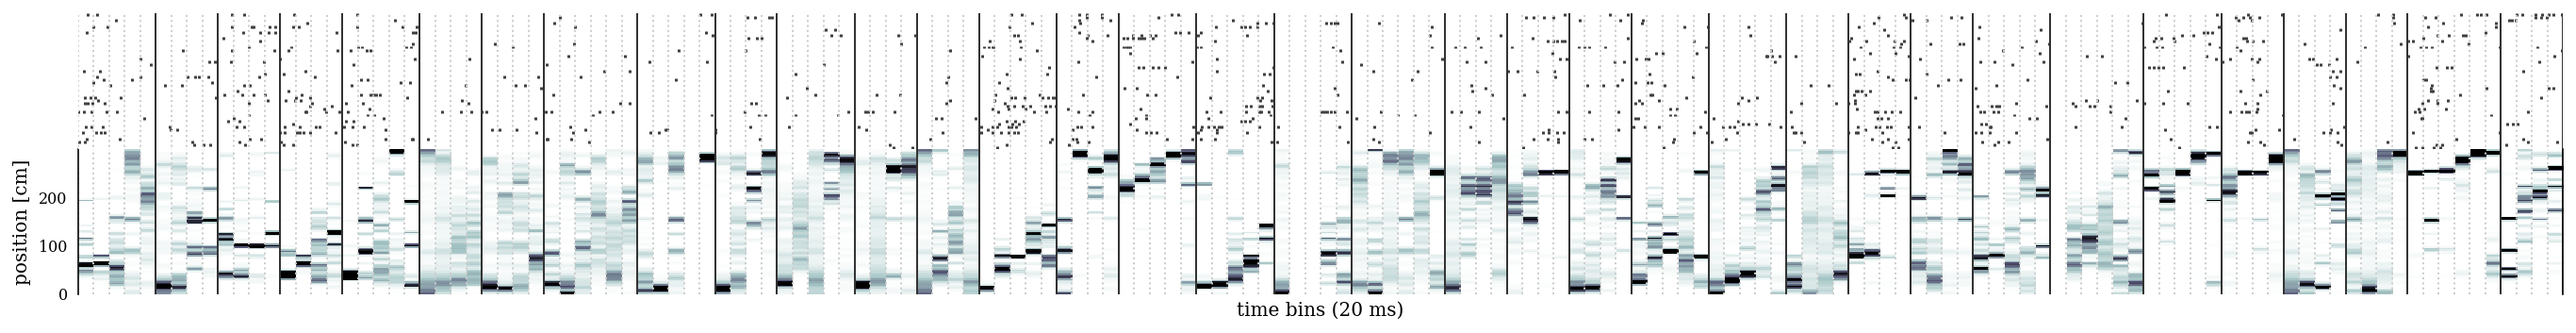

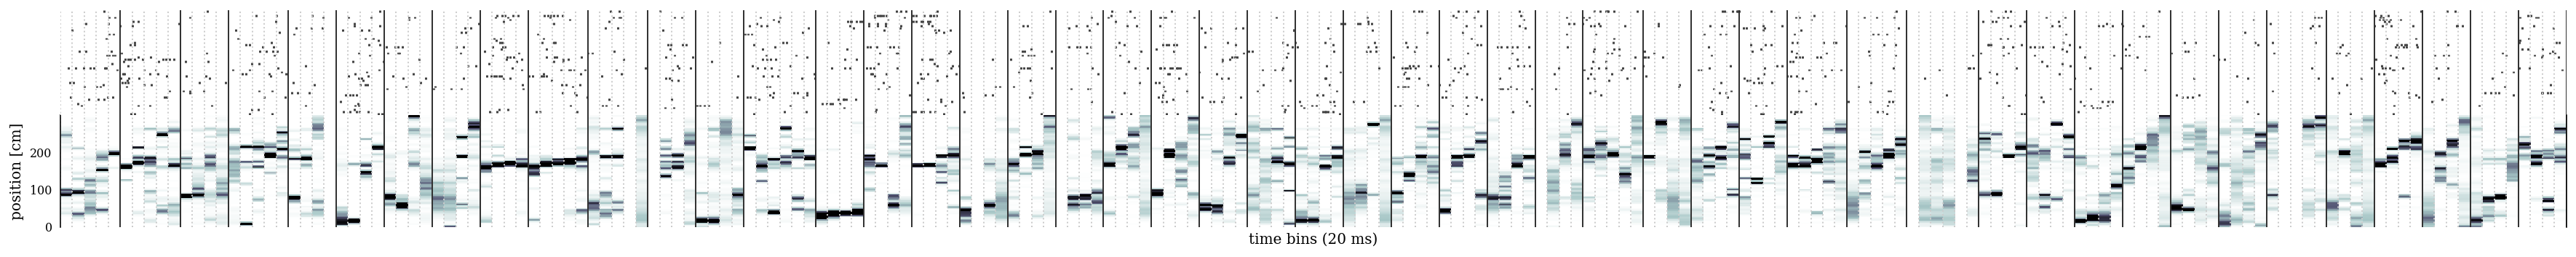

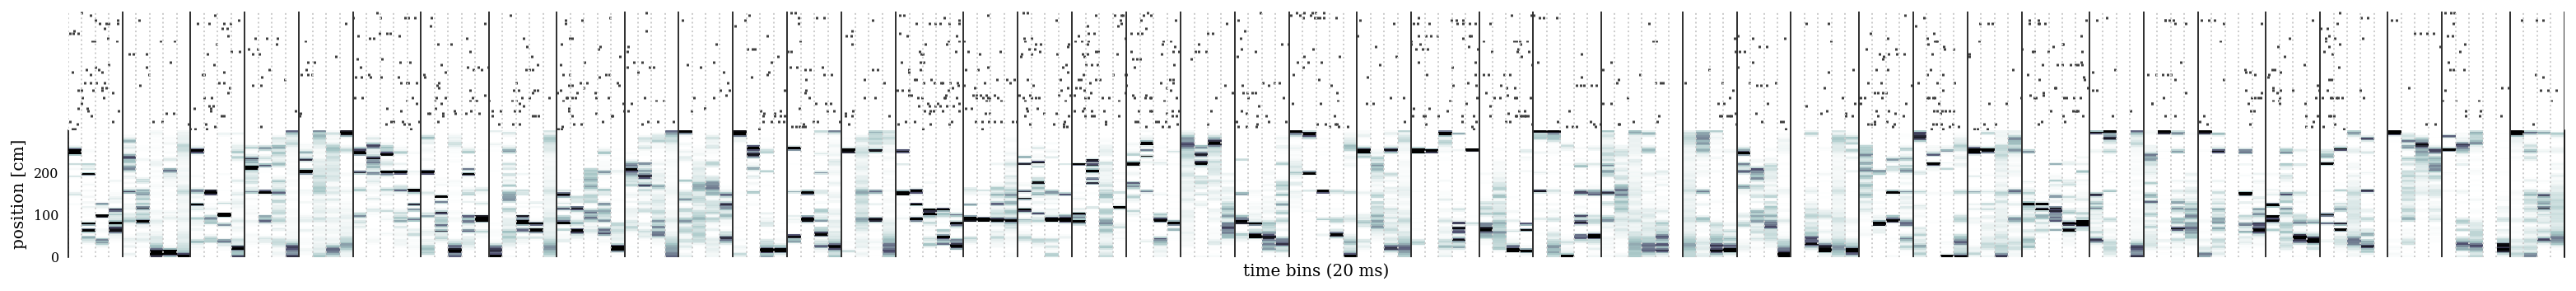

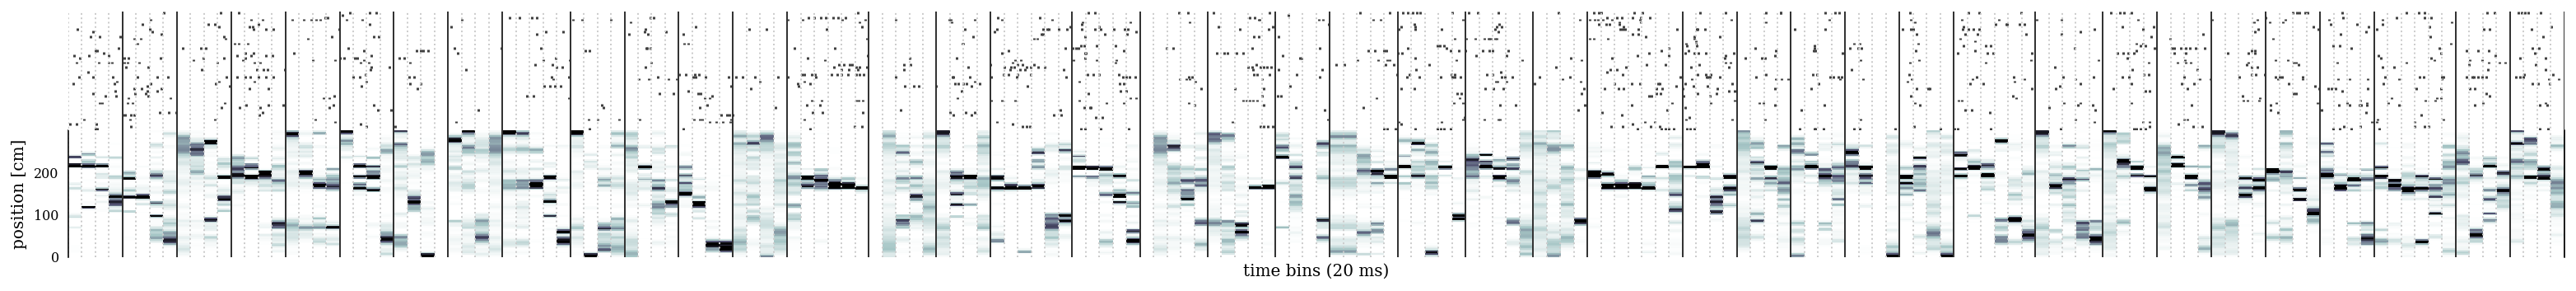

In [22]:
forward_path = os.path.join(fig_save_path, 'replay_examples', 'forward')
reverse_path = os.path.join(fig_save_path, 'replay_examples', 'reverse')

if not os.path.isdir(forward_path):
    os.mkdir(forward_path)
if not os.path.isdir(reverse_path):
    os.mkdir(reverse_path)

sessions = glob.glob(save_path + os.sep + '*.pkl')
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)

    if results is None:
        continue
    
    basepath = results['outbound_epochs']['session']
    animal_name = loading.get_animal_id(basepath)
    basename = os.path.basename(basepath)
    idx = np.where((results['outbound_epochs']['df'].score_pval_time_swap < 0.05) &
                    (results['outbound_epochs']['df'].replay_type == 'forward'))[0]

    if (results['outbound_epochs']["decoding_r2_pval"] > 0.05) | (results['outbound_epochs']["decoding_median_error"] > 30):
        idx = []
            
    if len(idx) > 0:
        ax, fig = replay_fig.plot_all_replay(results['outbound_epochs']['bst_placecells'][idx],
                                                results['outbound_epochs']['sta_placecells'],
                                                results['outbound_epochs']['tc'],
                                                results['outbound_epochs']['tc'],
                                                vmax=.1)
        fig.savefig(os.path.join(fig_save_path, 'replay_examples', forward_path,
                    basename+'_'+animal_name+'outbound_epochs.jpeg'), dpi=300, bbox_inches='tight')
        plt.close(fig)

    idx = np.where((results['inbound_epochs']['df'].score_pval_time_swap < 0.05) &
                    (results['inbound_epochs']['df'].replay_type == 'forward'))[0]

    if (results['inbound_epochs']["decoding_r2_pval"] > 0.05) | (results['inbound_epochs']["decoding_median_error"] > 30):
        idx = []
    if len(idx) > 0:
        ax, fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                                results['inbound_epochs']['sta_placecells'],
                                                results['inbound_epochs']['tc'],
                                                results['inbound_epochs']['tc'],
                                                vmax=.1)
        fig.savefig(os.path.join(fig_save_path, 'replay_examples', forward_path,
                    basename+'_'+animal_name+'inbound_epochs.jpeg'), dpi=300, bbox_inches='tight')
        plt.close(fig)

    idx = np.where((results['outbound_epochs']['df'].score_pval_time_swap < 0.05) &
                    (results['outbound_epochs']['df'].replay_type == 'reverse'))[0]
    if (results['outbound_epochs']["decoding_r2_pval"] > 0.05) | (results['outbound_epochs']["decoding_median_error"] > 30):
        idx = []               
    if len(idx) > 0:
        ax, fig = replay_fig.plot_all_replay(results['outbound_epochs']['bst_placecells'][idx],
                                                results['outbound_epochs']['sta_placecells'],
                                                results['outbound_epochs']['tc'],
                                                results['outbound_epochs']['tc'],
                                                vmax=.1)
        fig.savefig(os.path.join(fig_save_path, 'replay_examples', reverse_path,
                    basename+'_'+animal_name+'_outbound_epochs.jpeg'), dpi=300, bbox_inches='tight')
        plt.close(fig)

    idx = np.where((results['inbound_epochs']['df'].score_pval_time_swap < 0.05) &
                    (results['inbound_epochs']['df'].replay_type == 'reverse'))[0]
    if (results['inbound_epochs']["decoding_r2_pval"] > 0.05) | (results['inbound_epochs']["decoding_median_error"] > 30):
        idx = []                
    if len(idx) > 0:
        ax, fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                                results['inbound_epochs']['sta_placecells'],
                                                results['inbound_epochs']['tc'],
                                                results['inbound_epochs']['tc'],
                                                vmax=.1)
        fig.savefig(os.path.join(fig_save_path, 'replay_examples', reverse_path,
                    basename+'_'+animal_name+'_inbound_epochs.jpeg'), dpi=300, bbox_inches='tight')
        plt.close(fig)
